In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
import datetime
from shapely.geometry import Polygon, MultiPolygon
%matplotlib inline

In [2]:
ox.config(data_folder='Data', logs_folder='logs', 
          imgs_folder='imgs', cache_folder='cache',
          use_cache=True, log_console=True,log_name='osmnx', 
          log_file=True, log_filename='osmnx')

crs_osm = {'init':'epsg:4326'}           #crs that osm uses

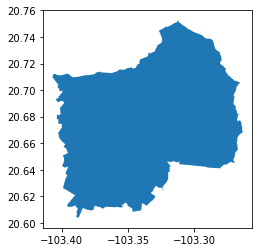

In [3]:
area = ox.gdf_from_place('Guadalajara, Mexico', which_result=2)
area.plot()

In [4]:
G = ox.graph_from_polygon(area.loc[0,'geometry'],retain_all=True,network_type='all_private')

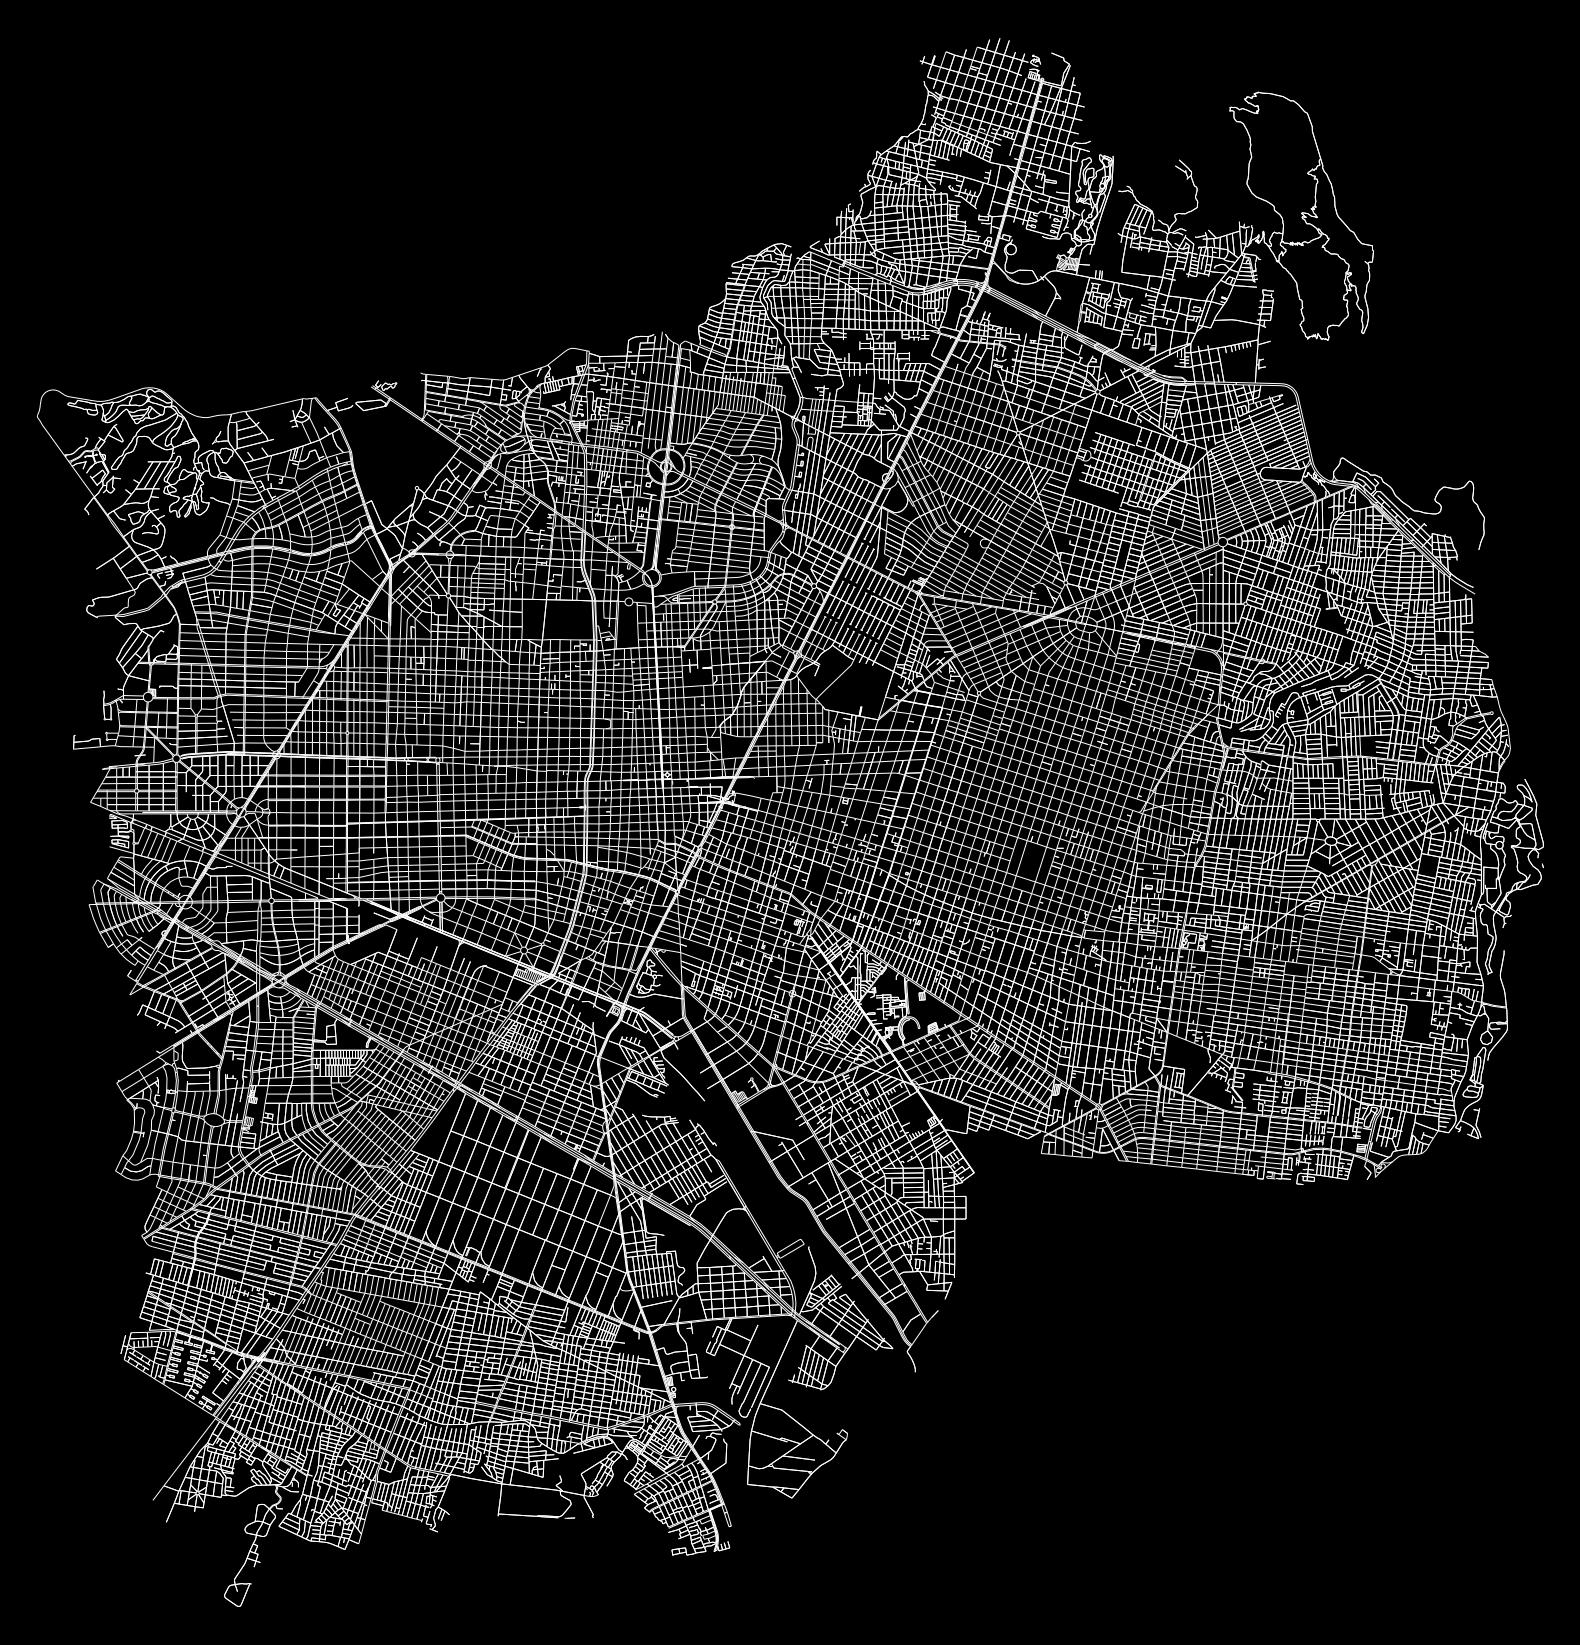

(<Figure size 2217.58x2160 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a292636d8>)

In [5]:
ox.plot_graph(G, fig_height=30, show=True, close=False,edge_color='white', node_color='#e4007c', node_alpha=0, edge_linewidth=1,bgcolor='black')

In [6]:
import requests, json

def getGenders(names):
	url = ""
	cnt = 0
	if not isinstance(names,list):
		names = [names,]
	
	for name in names:
		if url == "":
			url = "name[0]=" + name
		else:
			cnt += 1
			url = url + "&name[" + str(cnt) + "]=" + name
		

	req = requests.get("https://api.genderize.io?" + url)
	results = json.loads(req.text)
	
	retrn = []
	for result in results:
		if result["gender"] is not None:
			retrn.append((result["gender"], result["probability"], result["count"]))
		else:
			retrn.append((u'None',u'0.0',0.0))
	return retrn

In [7]:
edges = ox.graph_to_gdfs(G,nodes=False)

In [8]:
edges.head()

,access,bridge,geometry,highway,junction,key,lanes,length,maxspeed,name,oneway,osmid,ref,service,tunnel,u,v,width
0,NaN,NaN,"LINESTRING (-103.3063086 20.7115326, -103.3068...",tertiary,NaN,0,NaN,168.217,NaN,Calle San Ignacio,False,105072369,NaN,NaN,NaN,28751344,28757777,NaN
1,NaN,NaN,"LINESTRING (-103.3063086 20.7115326, -103.3062...",secondary,NaN,0,NaN,22.826,NaN,NaN,True,147983303,NaN,NaN,NaN,28751344,1610958191,NaN
2,NaN,NaN,"LINESTRING (-103.3166454 20.7006495, -103.3162...",residential,NaN,0,NaN,47.171,NaN,Calle Nudo de Cempoaltépetl,False,8148957,NaN,NaN,NaN,28753224,1601906810,NaN
3,NaN,NaN,"LINESTRING (-103.3166454 20.7006495, -103.3170...",residential,NaN,0,NaN,48.084,NaN,Calle Nudo de Cempoaltépetl,False,8148957,NaN,NaN,NaN,28753224,1601906764,NaN
4,NaN,NaN,"LINESTRING (-103.3166454 20.7006495, -103.3155...",residential,NaN,0,NaN,206.447,NaN,Calle Salina Cruz,False,146994344,NaN,NaN,NaN,28753224,1601906616,NaN


In [9]:
names = edges['name'].dropna(0)

In [12]:
list_names = [i for i in list(names) if type(i)!=list]


In [13]:
unique = set(list_names)

In [17]:
results = {}
for n in unique:
    words = n.split()
    try:
        result_temp = getGenders(words[1])
        results[n] = result_temp
    except:
        pass


In [18]:
results

{}